Jotainjotain

# Postprocessing

As postprocessing, we run different low-pass filter and morphological operations for different land cover classes.

In [ ]:
import cv2
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ex_data = '../results/raw/214307_1985.tif'
with rio.open(ex_data) as src:
    data = src.read(1)

## Fields

<matplotlib.image.AxesImage>

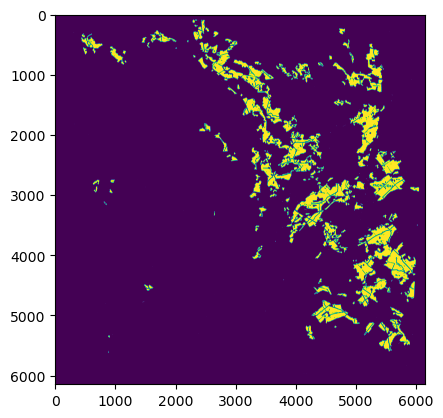

In [ ]:
fields = np.empty(data.shape)
fields[data==1] = 1
fields = fields.astype(np.uint8)
plt.imshow(fields)

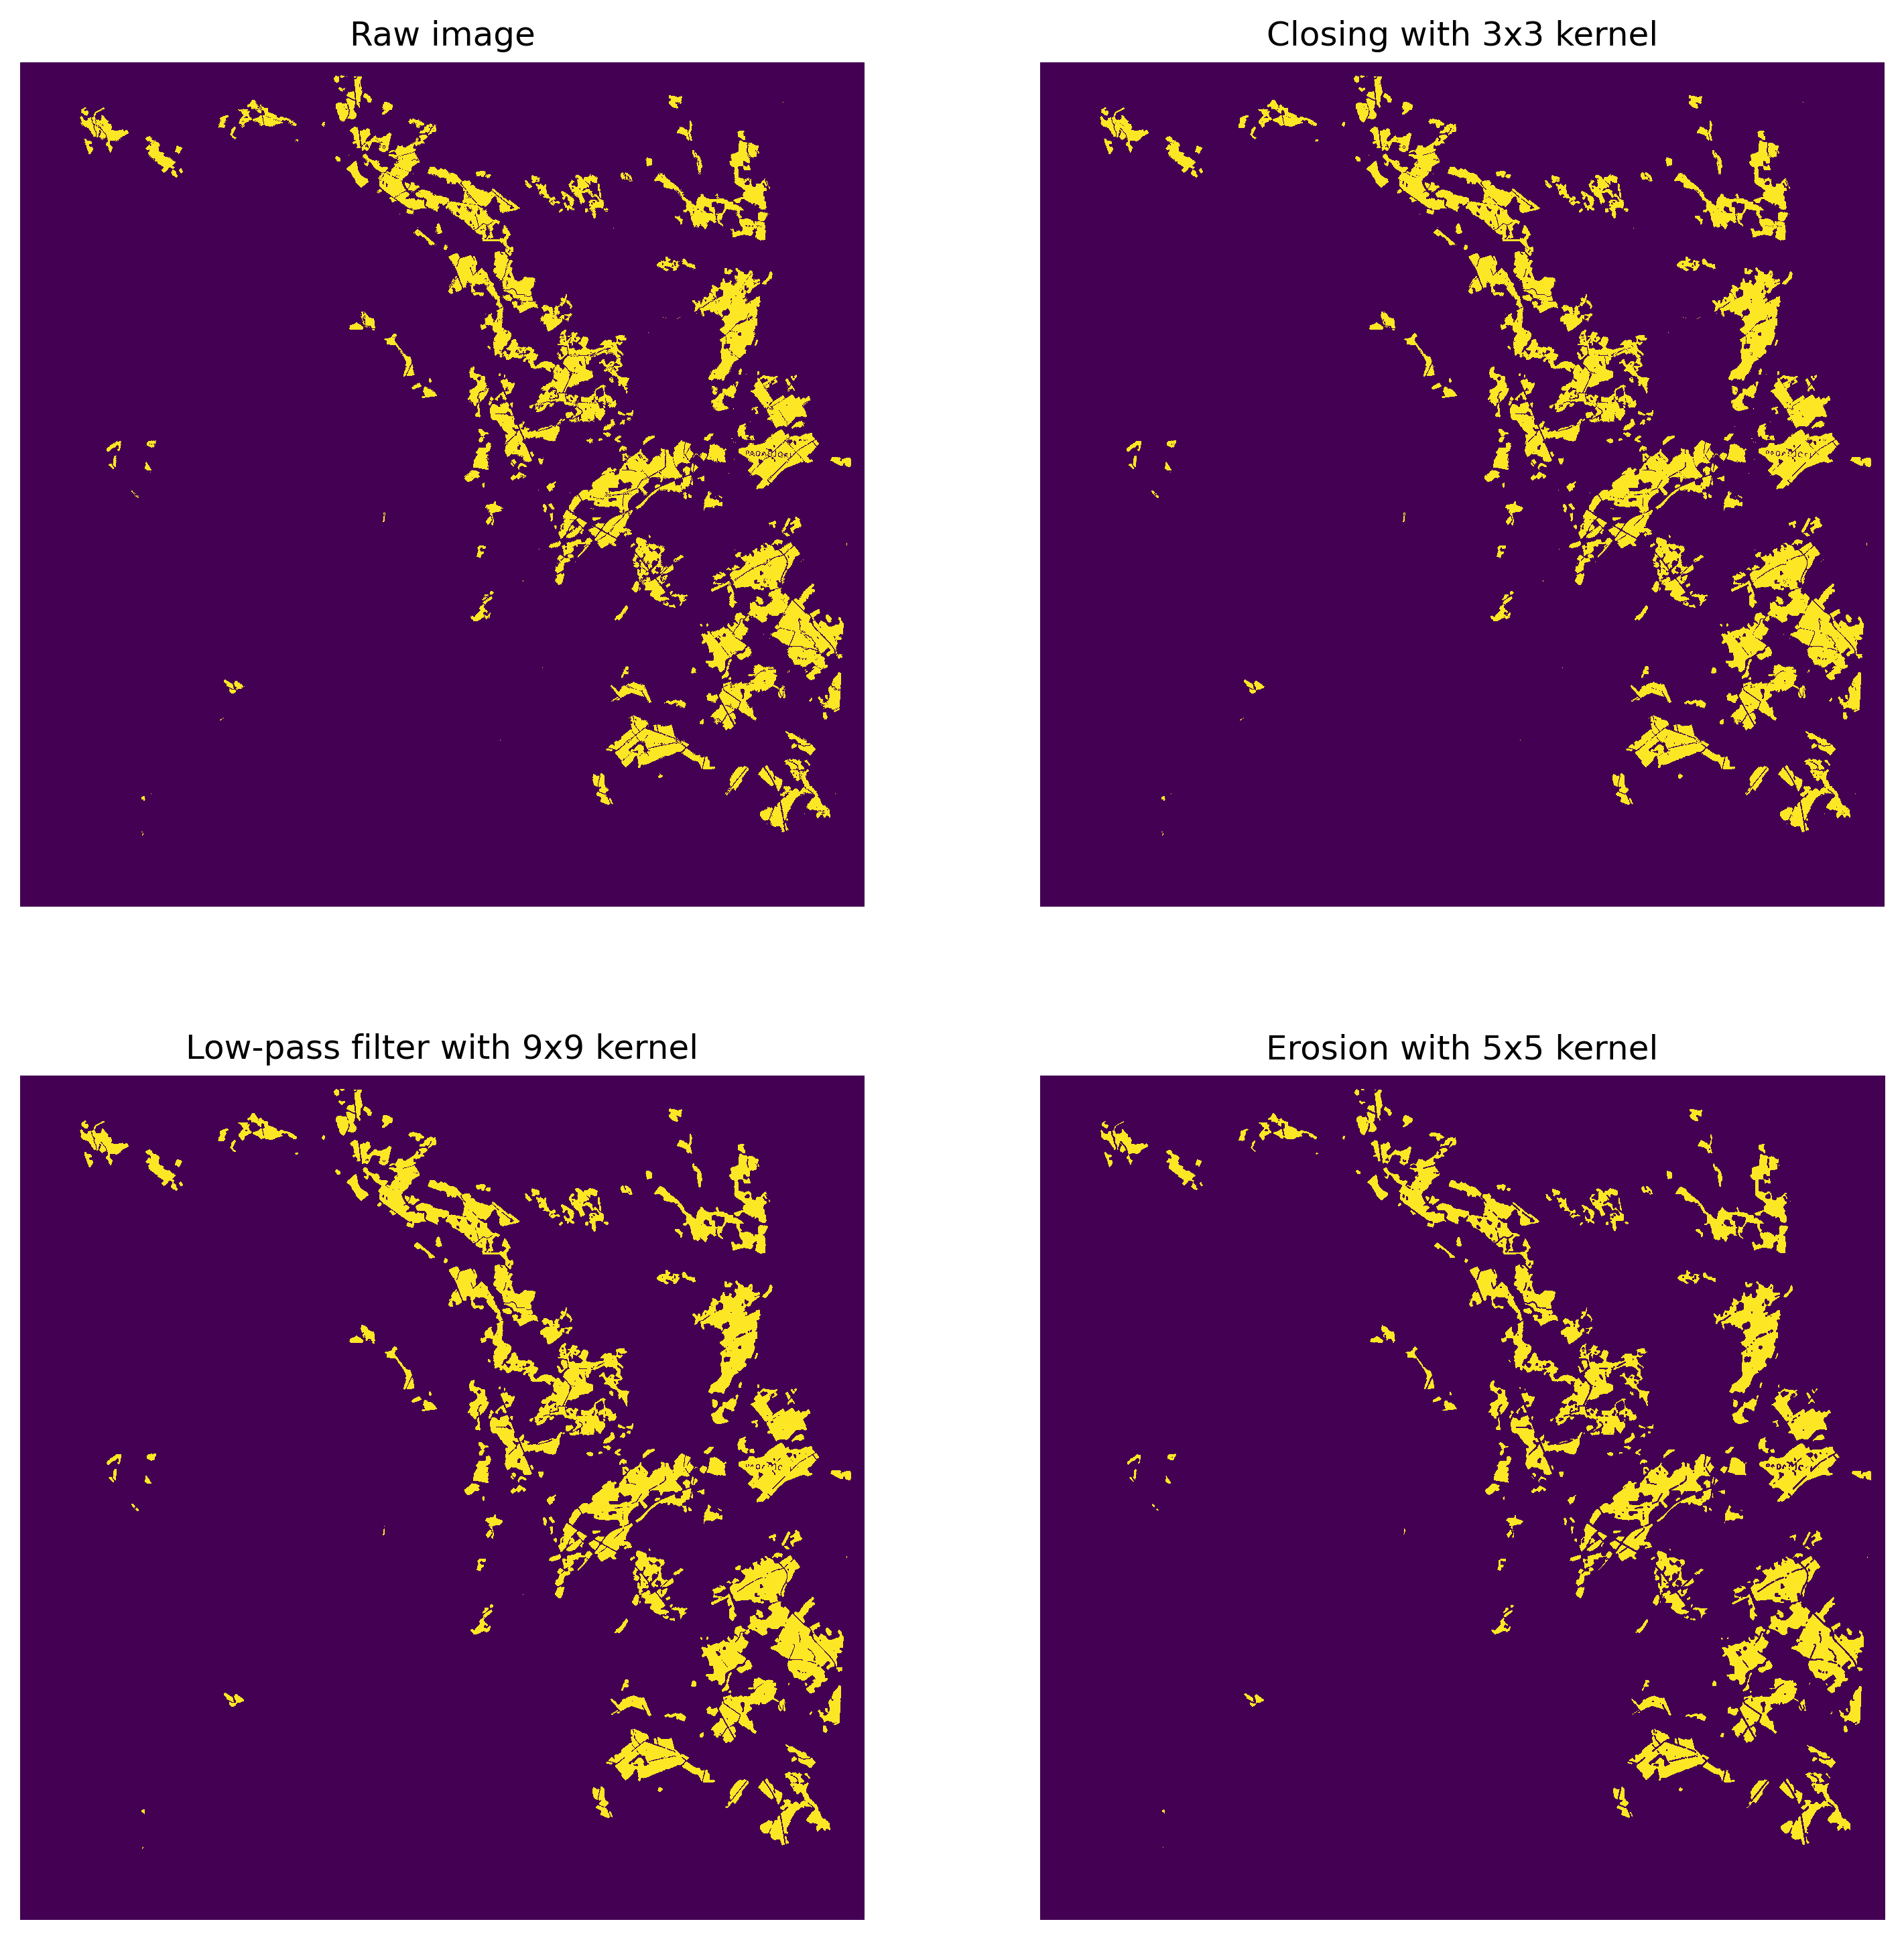

In [ ]:
fig, axs = plt.subplots(2,2, dpi=300, figsize=(12,12))
for a in axs.flatten(): a.axis('off')
    
axs[0,0].imshow(fields, interpolation='none')
axs[0,0].set_title('Raw image')

kernel = np.ones((3,3), np.uint8)
closed_ex = cv2.morphologyEx(fields, cv2.MORPH_CLOSE, kernel)
axs[0,1].imshow(closed_ex, interpolation='none')
axs[0,1].set_title('Closing with 3x3 kernel')

lpf_kernel = np.ones((9,9), np.float32)/81

lpf_ex = cv2.filter2D(closed_ex, -1, lpf_kernel)

axs[1,0].imshow(lpf_ex, interpolation='none')
axs[1,0].set_title('Low-pass filter with 9x9 kernel')

eroded = cv2.erode(lpf_ex, np.ones((5,5), np.uint8), iterations=1)

axs[1,1].imshow(eroded, interpolation='none')
axs[1,1].set_title('Erosion with 5x5 kernel')
plt.show()

## Marshes

<matplotlib.image.AxesImage>

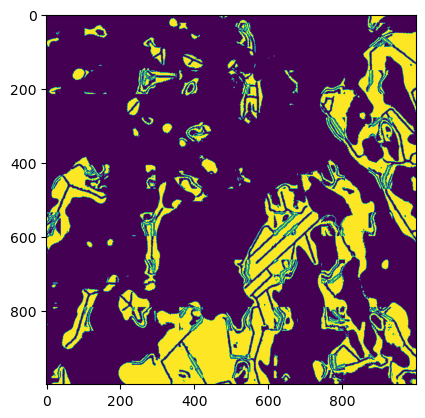

In [ ]:
marshes = np.empty(data.shape)
marshes[data==2] = 1
marshes = marshes.astype(np.uint8)
marshes = marshes[5000:6000, 3000:4000]
plt.imshow(marshes)

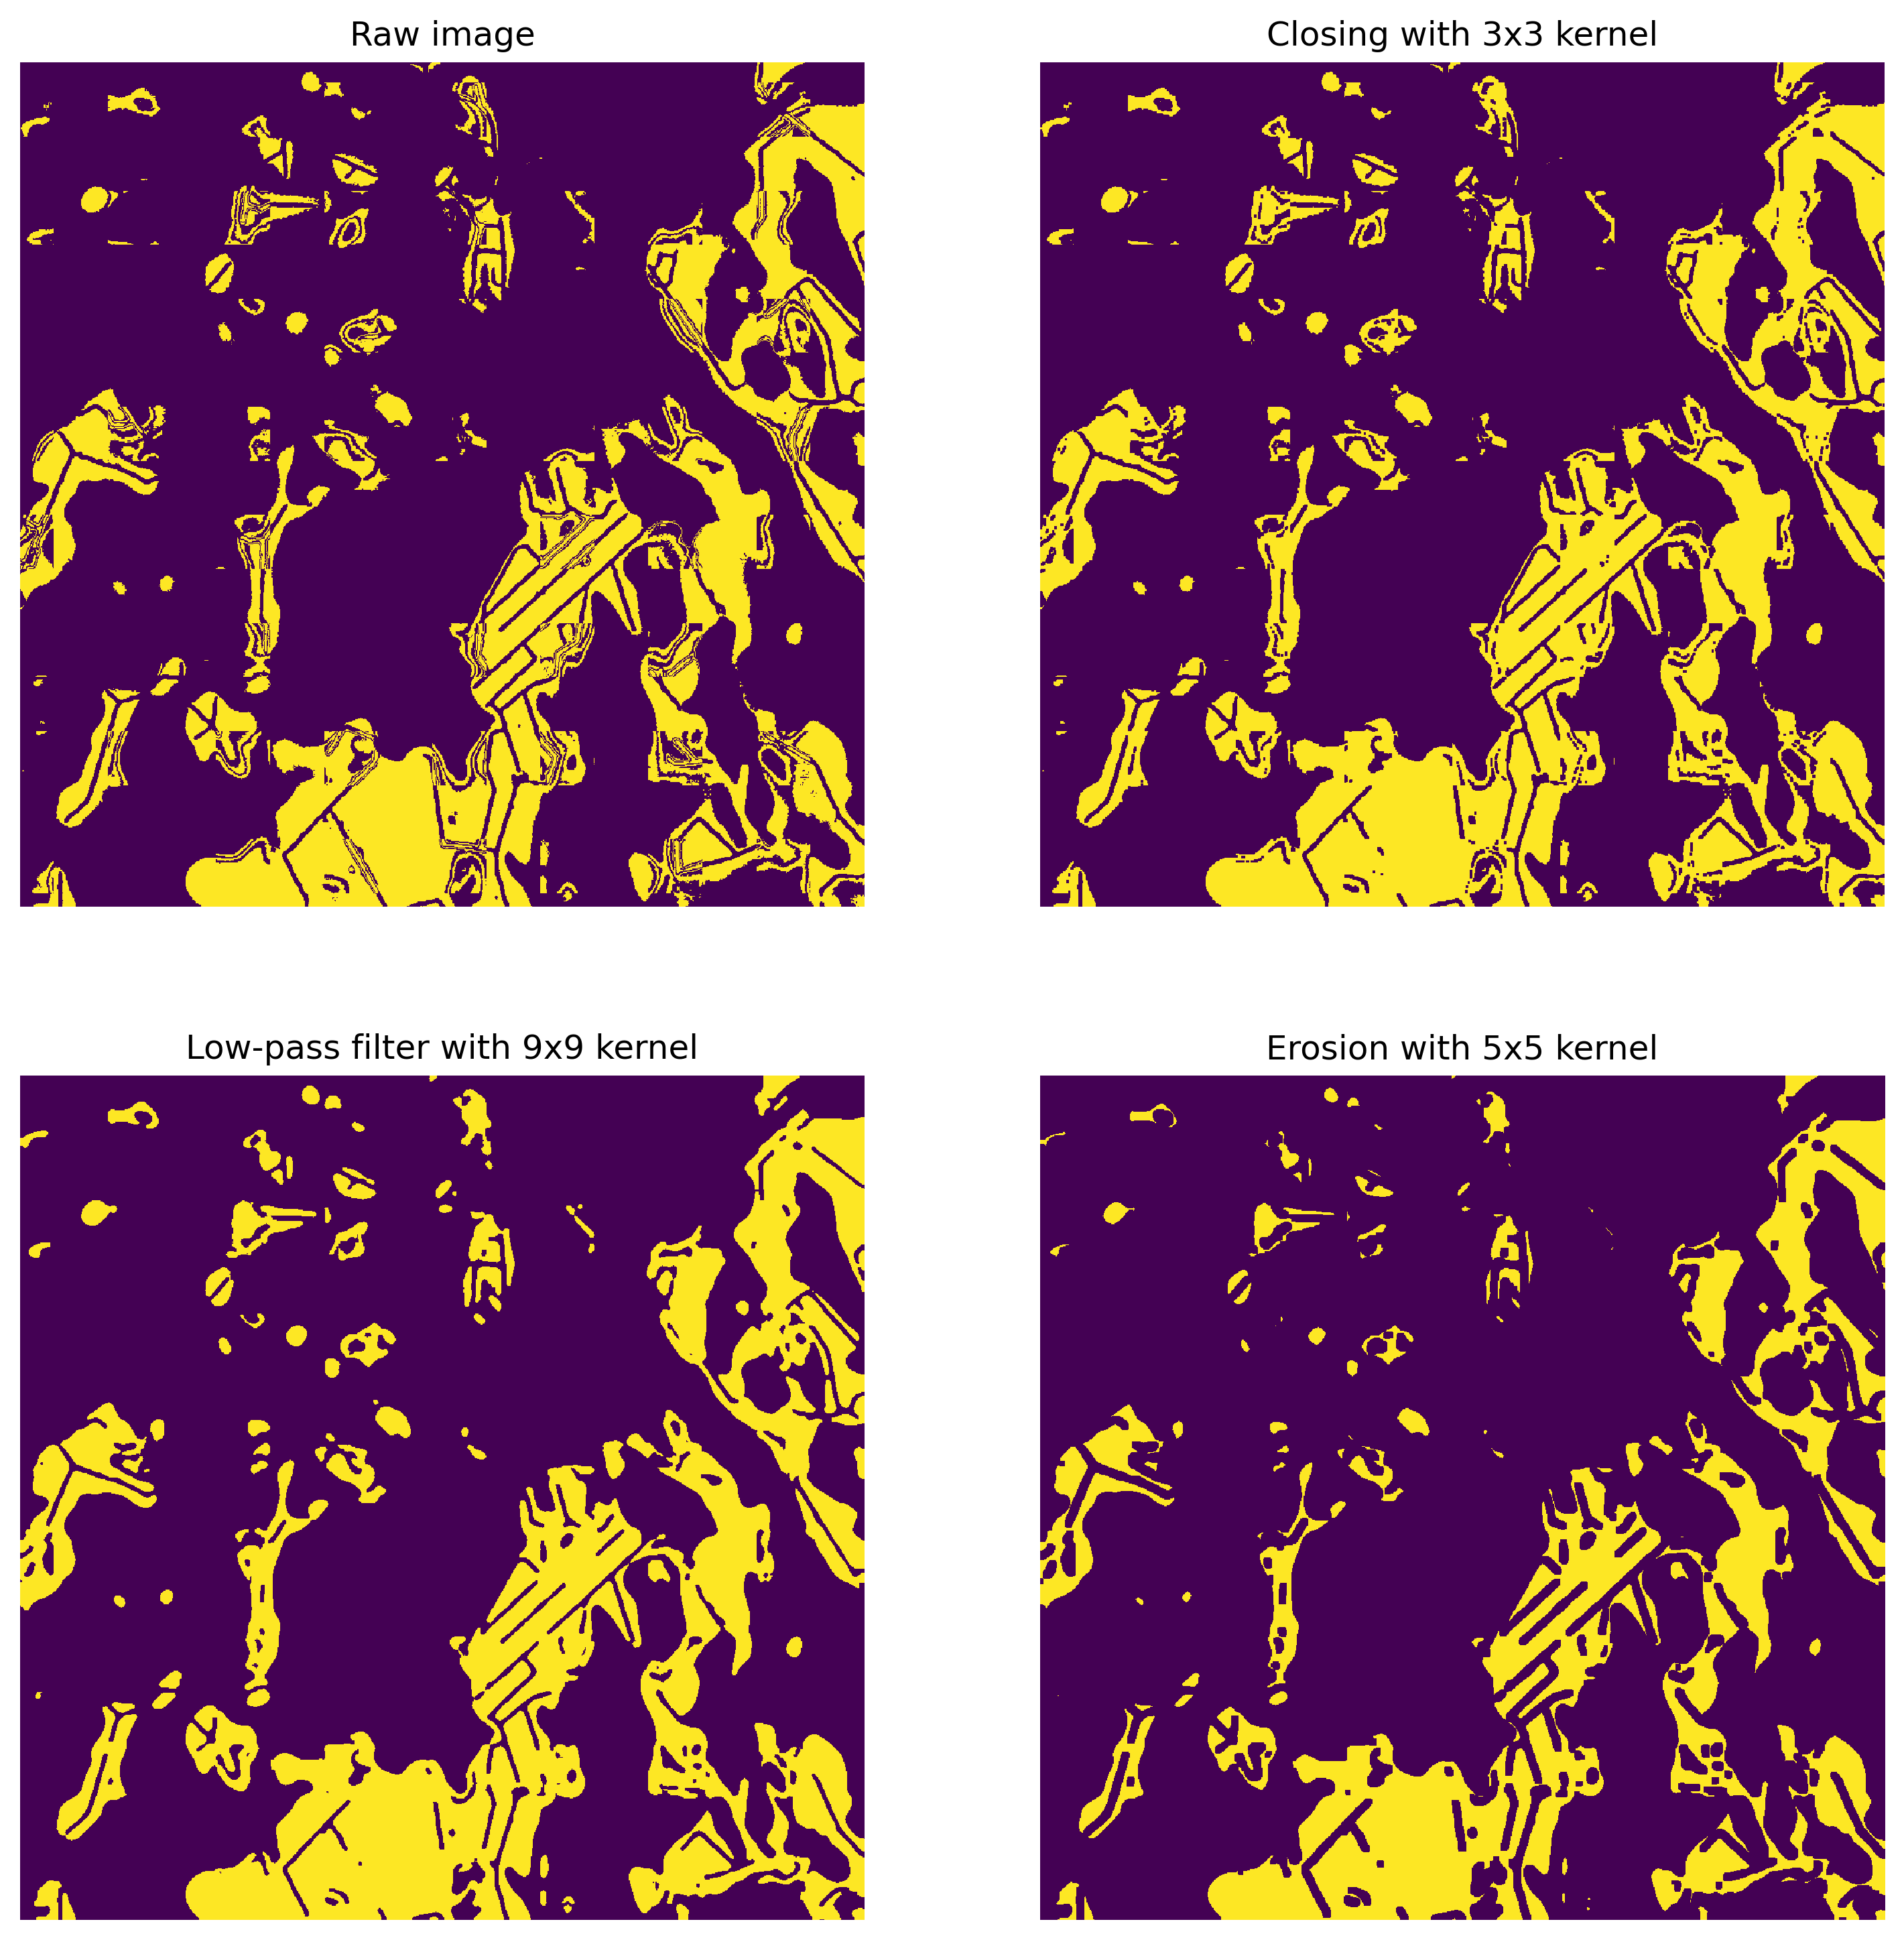

In [ ]:
fig, axs = plt.subplots(2,2, dpi=300, figsize=(12,12))
for a in axs.flatten(): a.axis('off')
    
axs[0,0].imshow(marshes, interpolation='none')
axs[0,0].set_title('Raw image')

kernel = np.ones((3,3), np.uint8)
closed_ex = cv2.morphologyEx(marshes, cv2.MORPH_CLOSE, kernel)
axs[0,1].imshow(closed_ex, interpolation='none')
axs[0,1].set_title('Closing with 3x3 kernel')

lpf_kernel = np.ones((9,9), np.float32)/81

lpf_ex = cv2.filter2D(closed_ex, -1, lpf_kernel)

axs[1,0].imshow(lpf_ex, interpolation='none')
axs[1,0].set_title('Low-pass filter with 9x9 kernel')

eroded = cv2.erode(lpf_ex, np.ones((5,5), np.uint8), iterations=1)

axs[1,1].imshow(eroded, interpolation='none')
axs[1,1].set_title('Erosion with 5x5 kernel')
plt.show()

## Roads

<matplotlib.image.AxesImage>

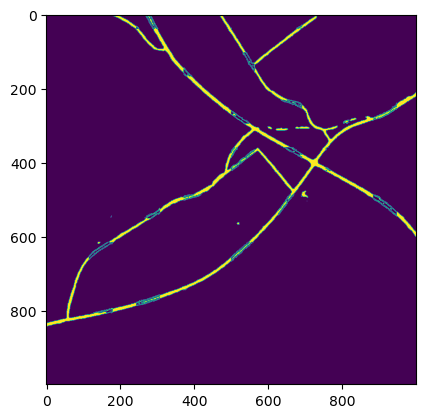

In [ ]:
roads = np.empty(data.shape)
roads[data==3] = 1
roads = roads.astype(np.uint8)
roads = roads[3000:4000, 3500:4500]
plt.imshow(roads)

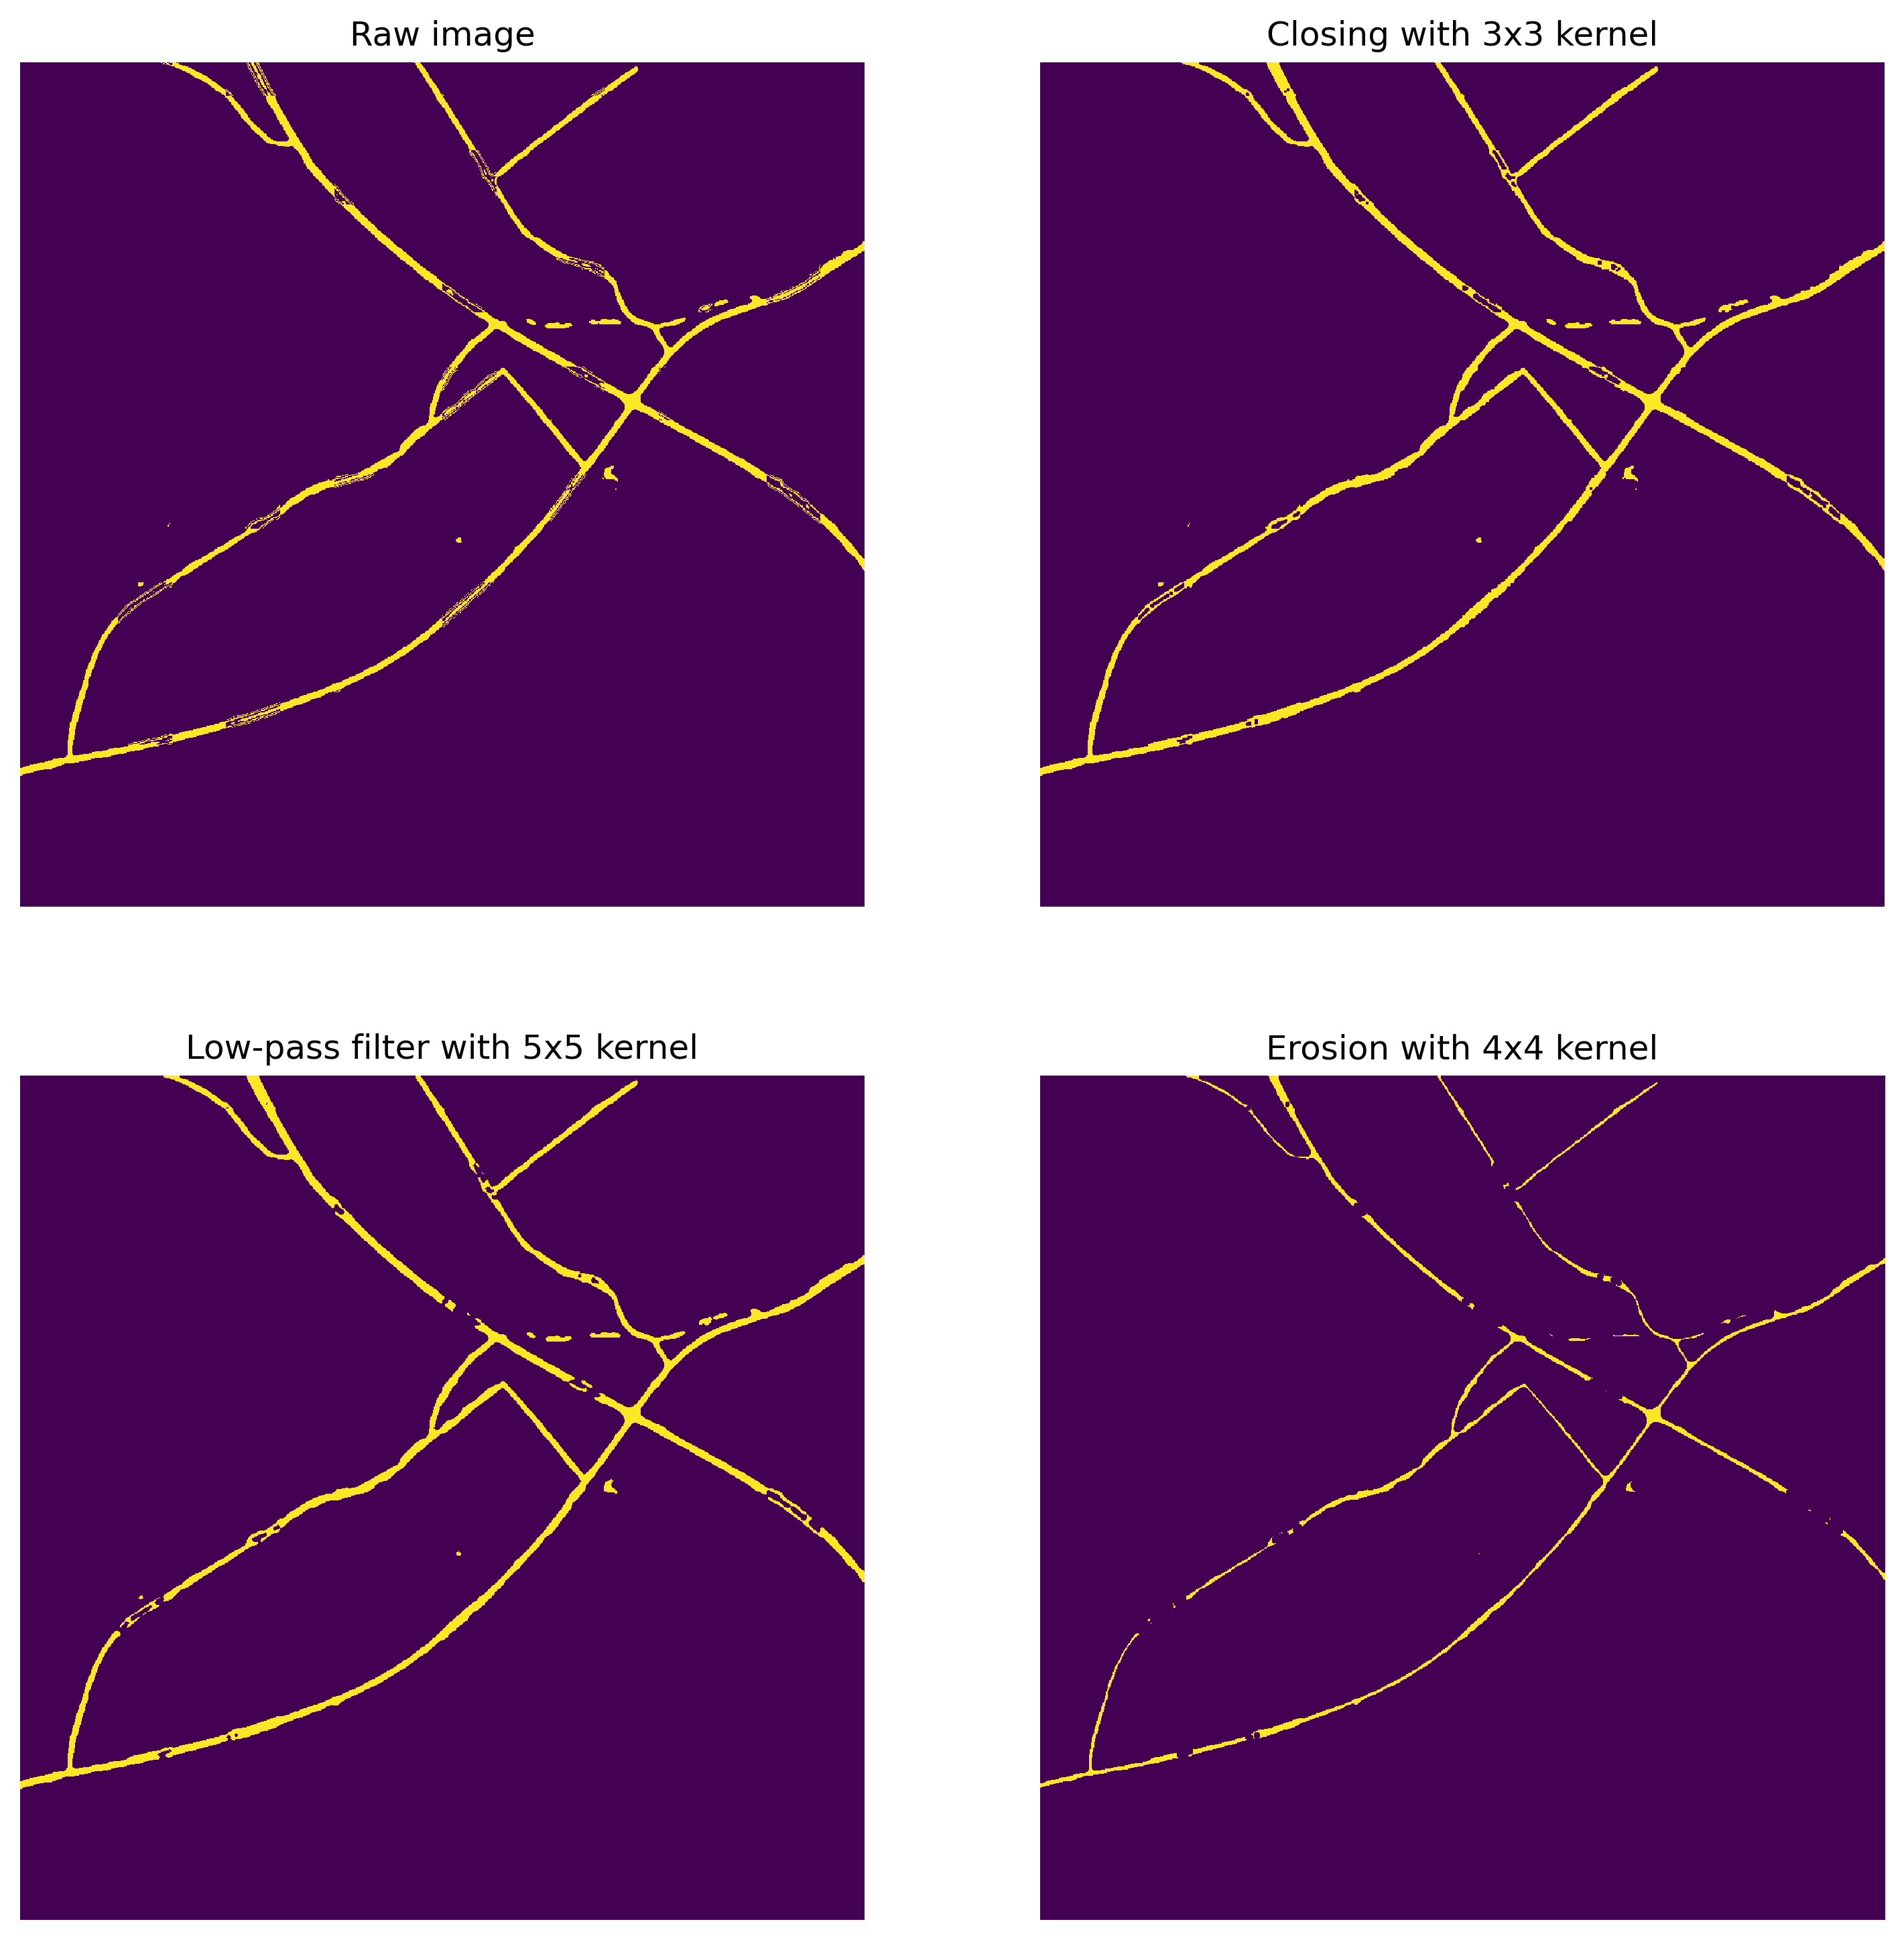

In [ ]:
fig, axs = plt.subplots(2,2, dpi=300, figsize=(12,12))
for a in axs.flatten(): a.axis('off')
    
axs[0,0].imshow(roads, interpolation='none')
axs[0,0].set_title('Raw image')

kernel = np.ones((3,3), np.uint8)
closed_ex = cv2.morphologyEx(roads, cv2.MORPH_CLOSE, kernel)
axs[0,1].imshow(closed_ex, interpolation='none')
axs[0,1].set_title('Closing with 3x3 kernel')

lpf_kernel = np.ones((5,5), np.float32)/25

lpf_ex = cv2.filter2D(closed_ex, -1, lpf_kernel)

axs[1,0].imshow(lpf_ex, interpolation='none')
axs[1,0].set_title('Low-pass filter with 5x5 kernel')

eroded = cv2.erode(lpf_ex, np.ones((4,4), np.uint8), iterations=1)

axs[1,1].imshow(eroded, interpolation='none')
axs[1,1].set_title('Erosion with 4x4 kernel')
plt.show()

Next step is to skeletonize roads in order to generate line geometries from them.

In [ ]:
from skimage.morphology import skeletonize

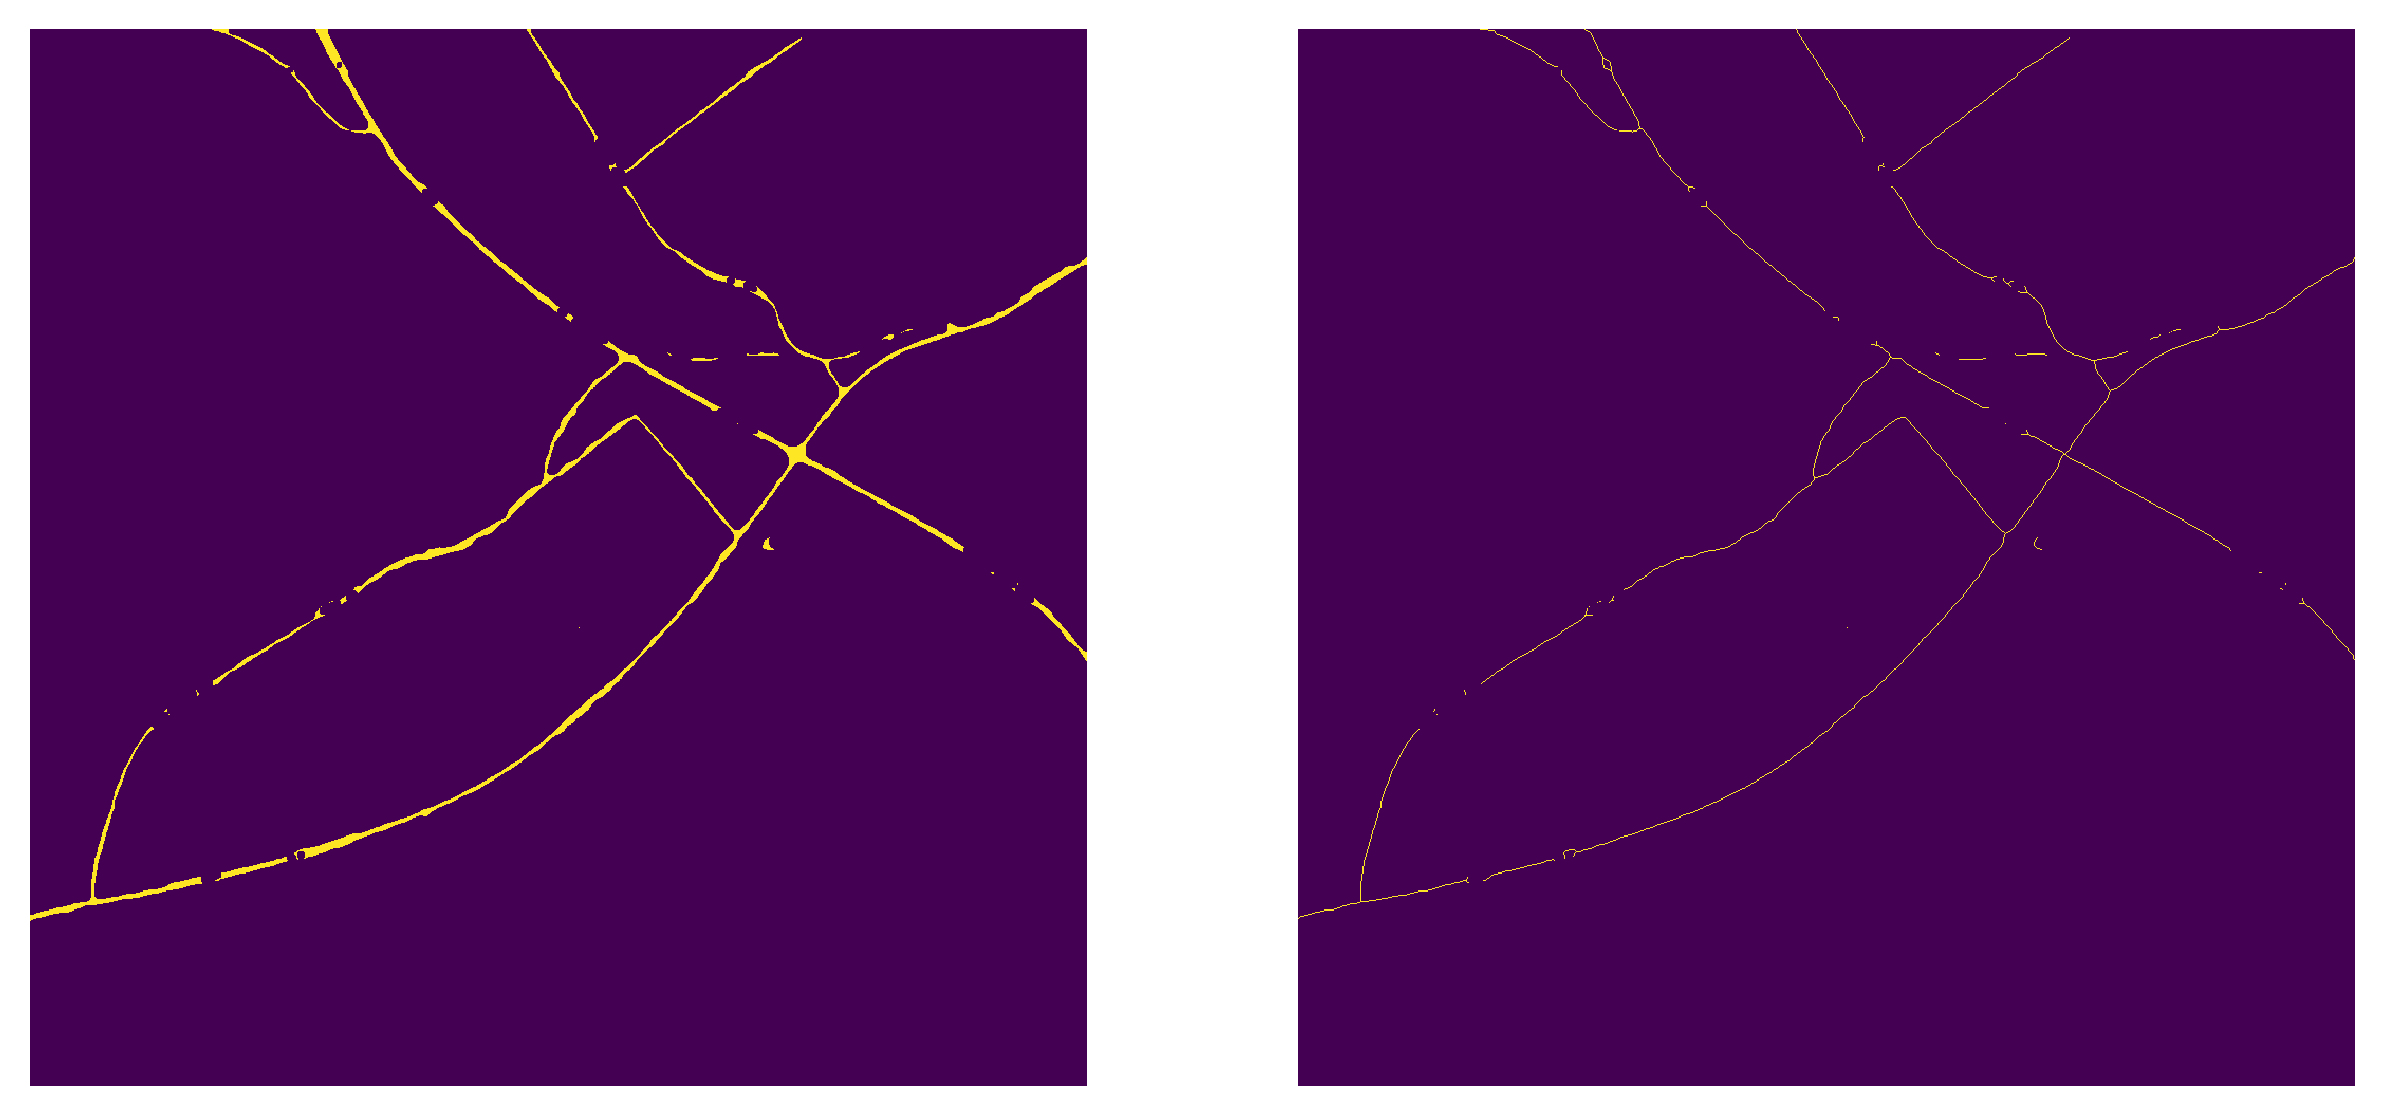

In [ ]:
skeletonized = skeletonize(eroded)

fig, axs = plt.subplots(1,2, figsize=(10,5), dpi=300)
for a in axs: a.axis('off')

axs[0].imshow(eroded, interpolation='none')
axs[1].imshow(skeletonized, interpolation='none')
plt.show()

These are then polygonized and merged into polygon data, that can then be used to get line geometries.

## Waterways

<matplotlib.image.AxesImage>

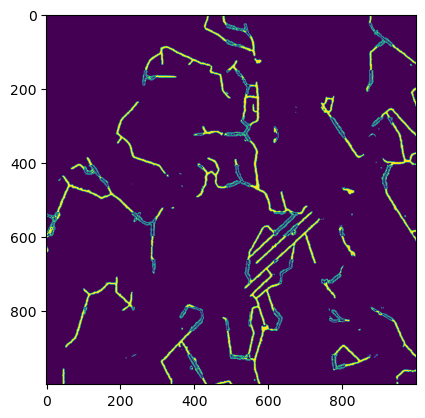

In [ ]:
waterways = np.empty(data.shape)
waterways[data==4] = 1
waterways = waterways.astype(np.uint8)
waterways = waterways[5000:6000, 3000:4000]
plt.imshow(waterways)

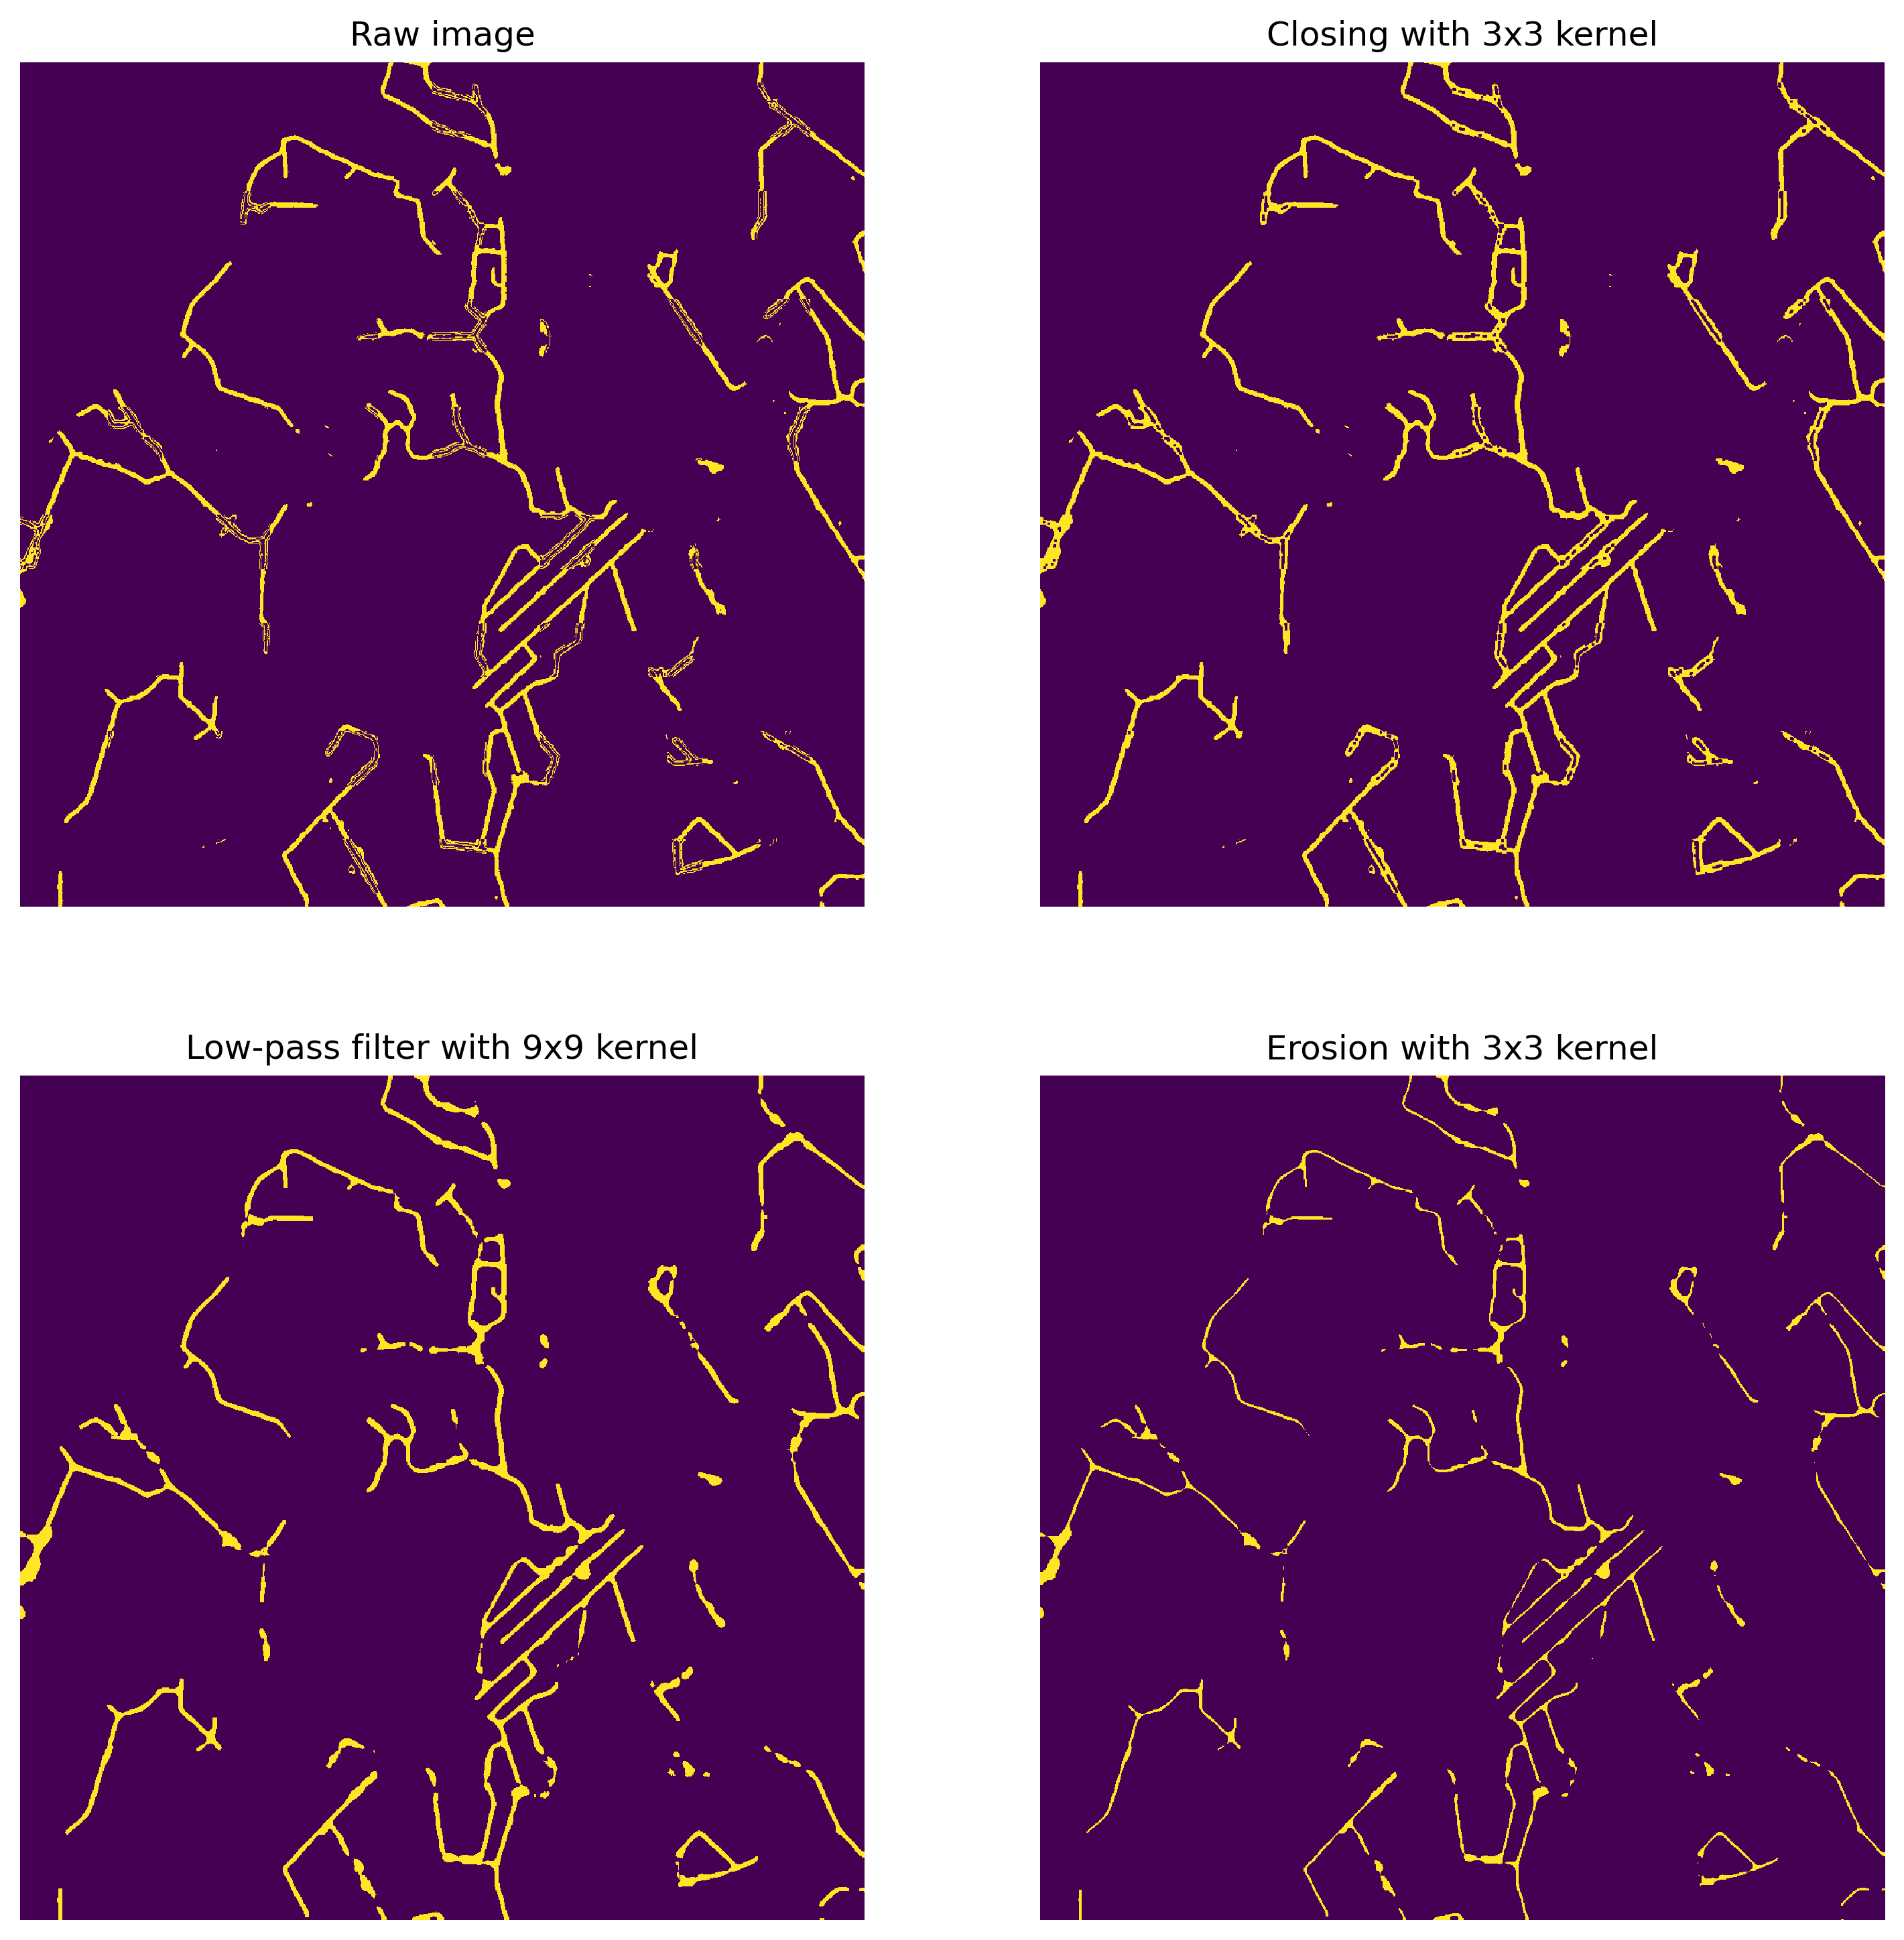

In [ ]:
fig, axs = plt.subplots(2,2, dpi=300, figsize=(12,12))
for a in axs.flatten(): a.axis('off')
    
axs[0,0].imshow(waterways, interpolation='none')
axs[0,0].set_title('Raw image')

kernel = np.ones((3,3), np.uint8)
closed_ex = cv2.morphologyEx(waterways, cv2.MORPH_CLOSE, kernel)
axs[0,1].imshow(closed_ex, interpolation='none')
axs[0,1].set_title('Closing with 3x3 kernel')

lpf_kernel = np.ones((9,9), np.float32)/81

lpf_ex = cv2.filter2D(closed_ex, -1, lpf_kernel)

axs[1,0].imshow(lpf_ex, interpolation='none')
axs[1,0].set_title('Low-pass filter with 9x9 kernel')

eroded = cv2.erode(lpf_ex, np.ones((3,3), np.uint8), iterations=1)

axs[1,1].imshow(eroded, interpolation='none')
axs[1,1].set_title('Erosion with 3x3 kernel')
plt.show()

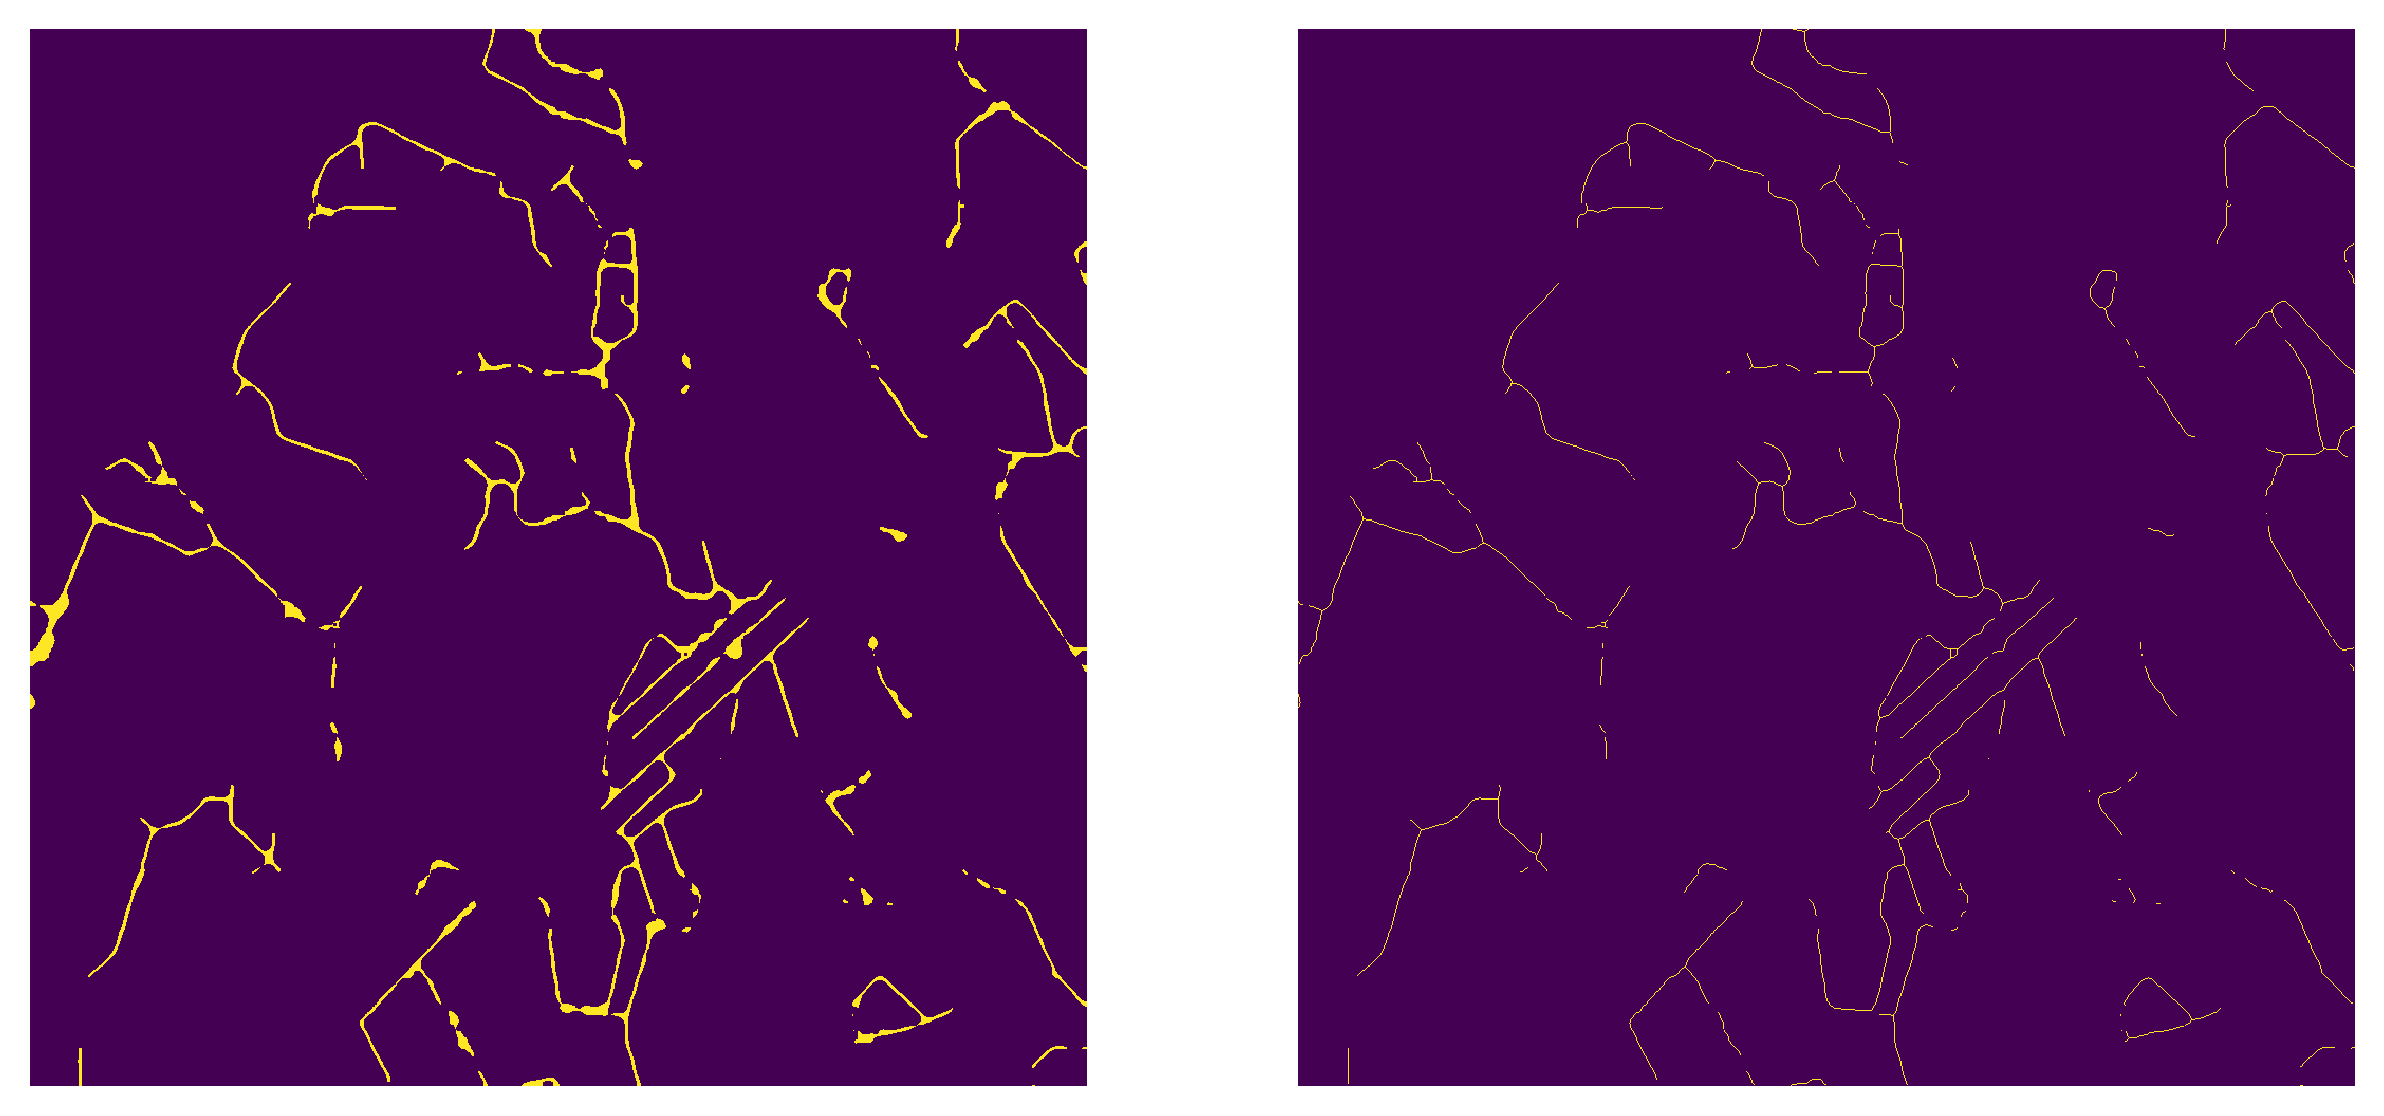

In [ ]:
skeletonized = skeletonize(eroded)

fig, axs = plt.subplots(1,2, figsize=(10,5), dpi=300)
for a in axs: a.axis('off')

axs[0].imshow(eroded, interpolation='none')
axs[1].imshow(skeletonized, interpolation='none')
plt.show()

## Water bodies

<matplotlib.image.AxesImage>

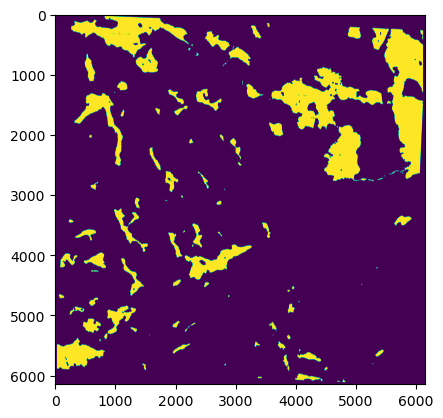

In [ ]:
waterbodies = np.empty(data.shape)
waterbodies[data==5] = 1
waterbodies = waterbodies.astype(np.uint8)
plt.imshow(waterbodies)

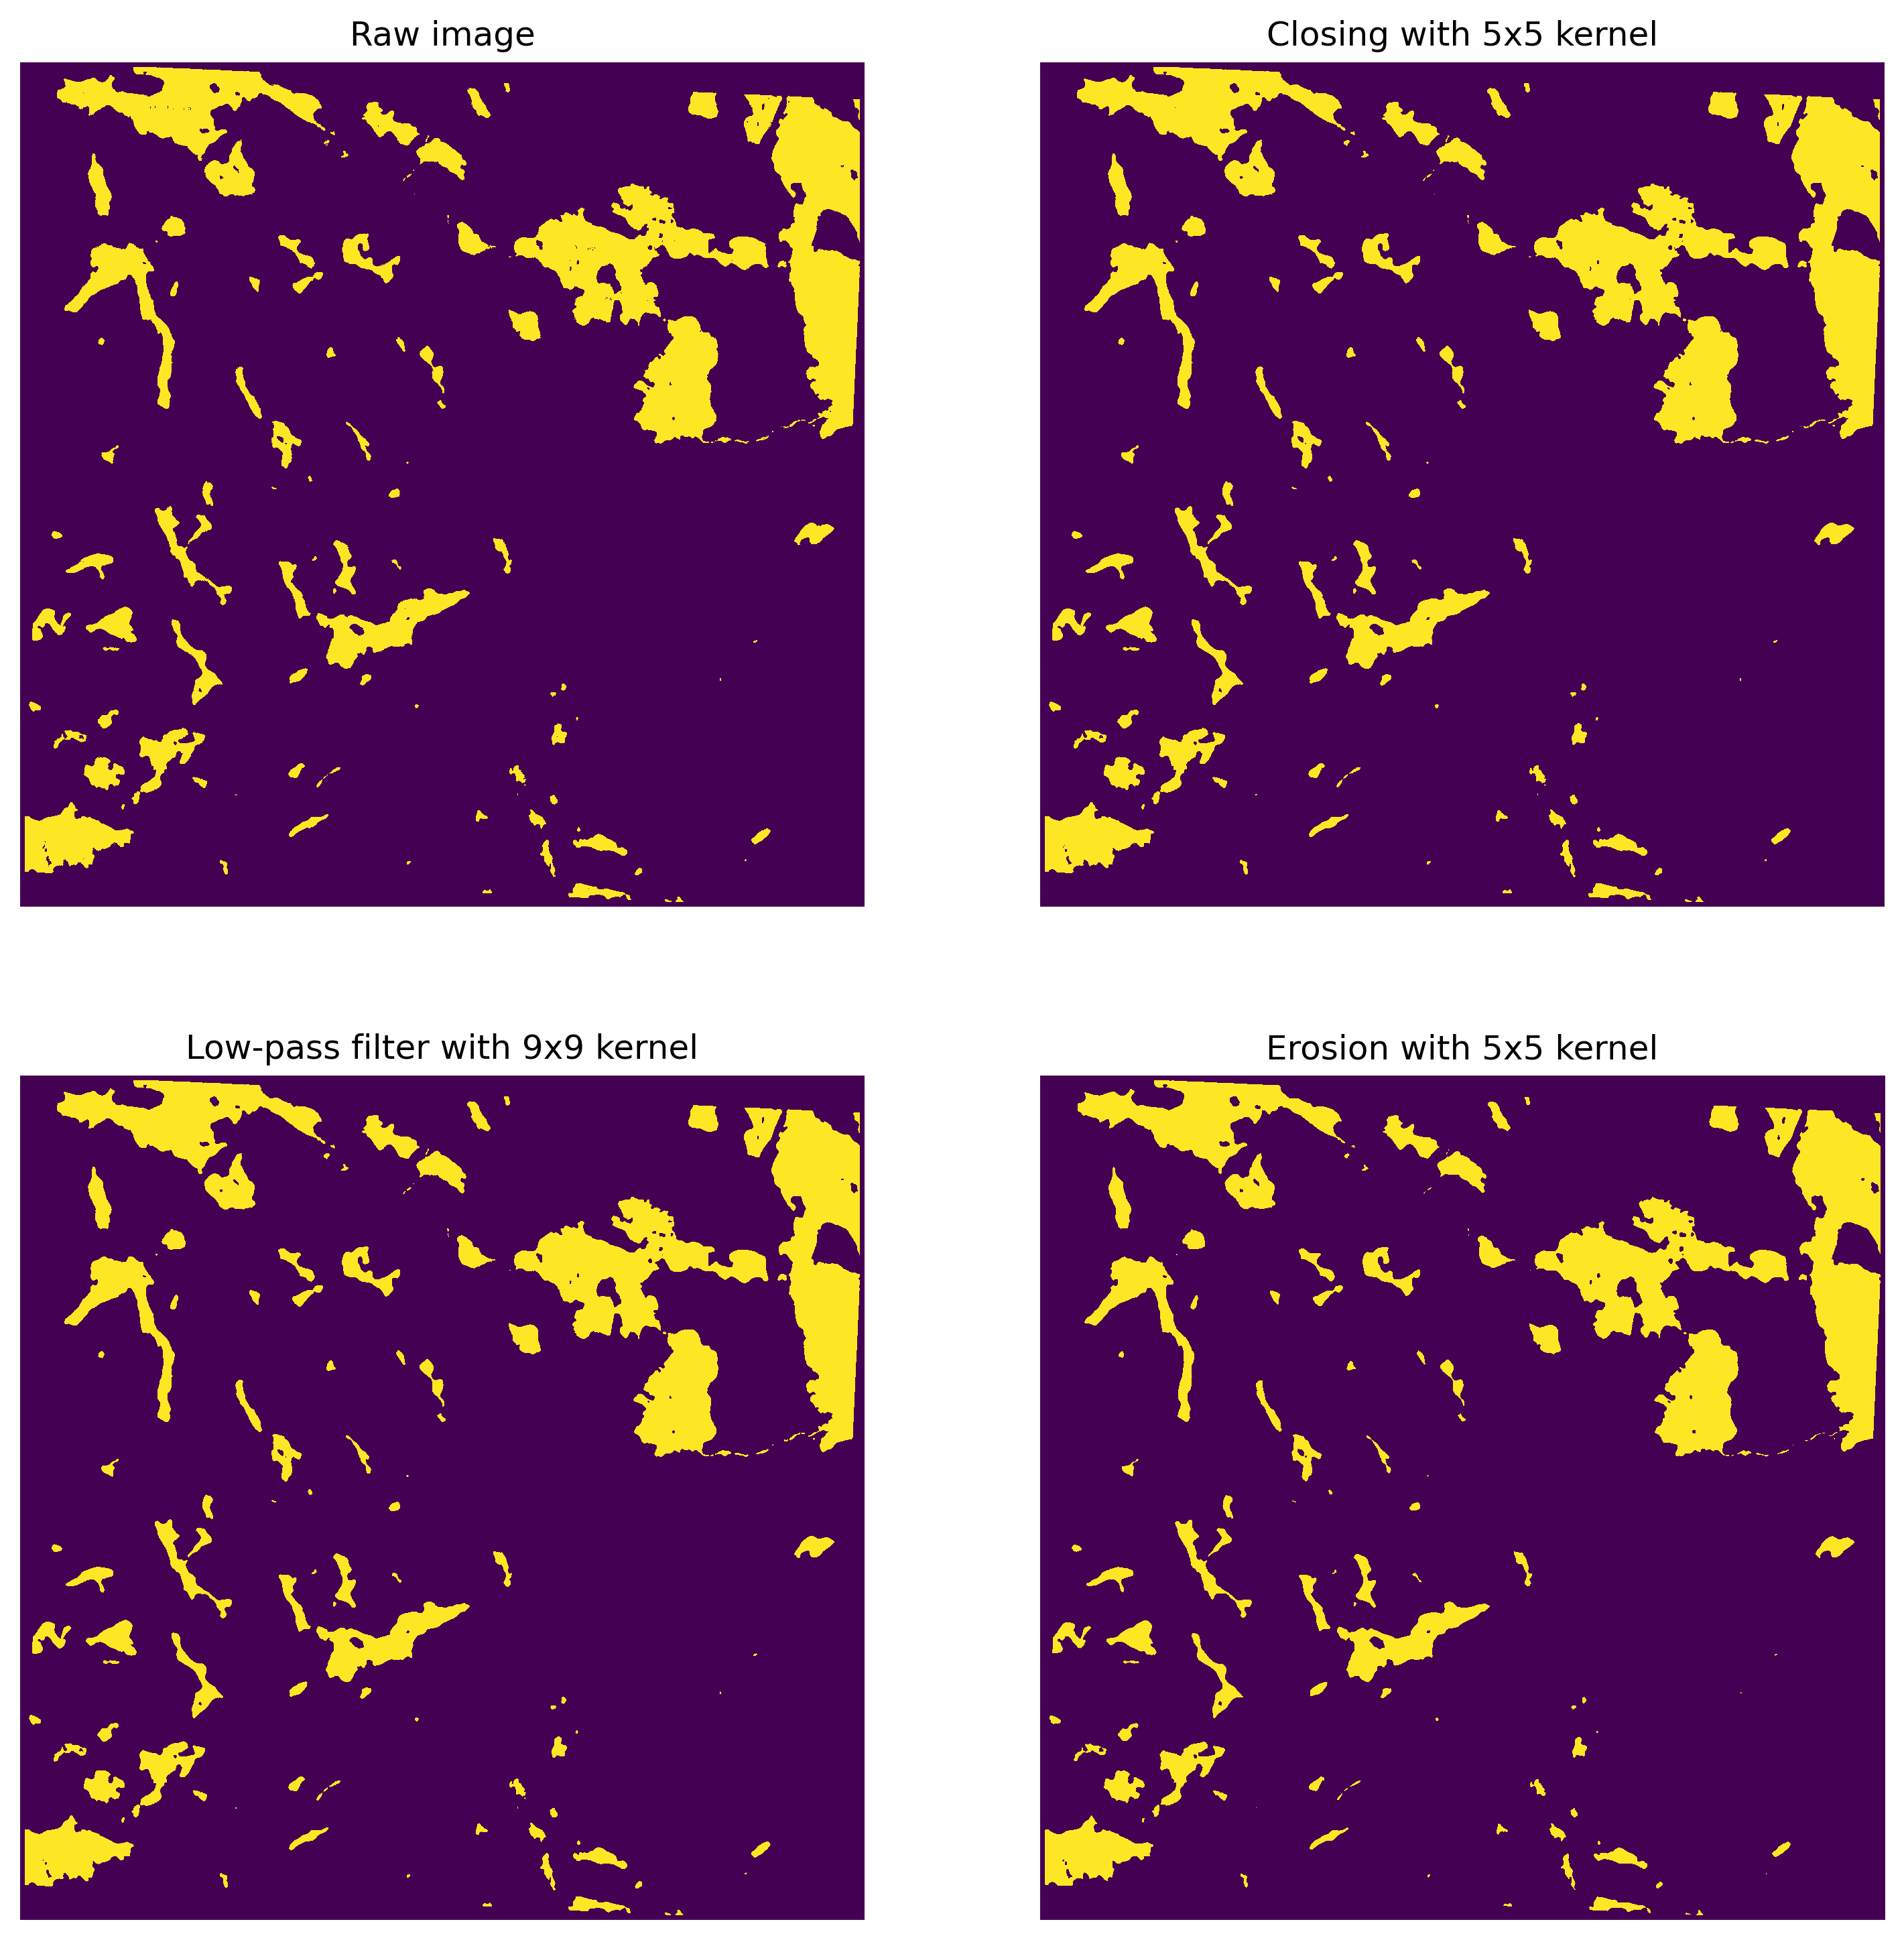

In [ ]:
fig, axs = plt.subplots(2,2, dpi=300, figsize=(12,12))
for a in axs.flatten(): a.axis('off')
    
axs[0,0].imshow(waterbodies, interpolation='none')
axs[0,0].set_title('Raw image')

kernel = np.ones((5,5), np.uint8)
closed_ex = cv2.morphologyEx(waterbodies, cv2.MORPH_CLOSE, kernel)
axs[0,1].imshow(closed_ex, interpolation='none')
axs[0,1].set_title('Closing with 5x5 kernel')

lpf_kernel = np.ones((9,9), np.float32)/81

lpf_ex = cv2.filter2D(closed_ex, -1, lpf_kernel)

axs[1,0].imshow(lpf_ex, interpolation='none')
axs[1,0].set_title('Low-pass filter with 9x9 kernel')

eroded = cv2.erode(lpf_ex, np.ones((5,5), np.uint8), iterations=1)

axs[1,1].imshow(eroded, interpolation='none')
axs[1,1].set_title('Erosion with 5x5 kernel')
plt.show()

## All together:

In [ ]:
def run_postproc_chain(inpath, outpath):
    with rio.open(inpath) as src:
        data = src.read()[0]
        prof = src.profile
    fields = np.where(data==1, 1, 0).astype(np.uint8)
    marshes = np.where(data==2, 1, 0).astype(np.uint8)
    roads = np.where(data==3, 1, 0).astype(np.uint8)
    waterways = np.where(data==4, 1, 0).astype(np.uint8)
    waterbodies = np.where(data==5, 1, 0).astype(np.uint8)

    fields = cv2.morphologyEx(fields, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
    fields = cv2.filter2D(fields, -1,  np.ones((9,9), np.float32)/81)

    marshes = cv2.morphologyEx(marshes, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
    marshes = cv2.filter2D(marshes, -1,  np.ones((9,9), np.float32)/81)
    
    roads = cv2.morphologyEx(roads, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
    roads = cv2.filter2D(roads, -1,  np.ones((5,5), np.float32)/25)
    roads = cv2.erode(roads, np.ones((4,4), np.uint8), iterations=1)

    waterways = cv2.morphologyEx(waterways, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
    waterways = cv2.filter2D(waterways, -1,  np.ones((9,9), np.float32)/81)
    waterways = cv2.erode(waterways, np.ones((3,3), np.uint8), iterations=1)
    
    waterbodies = cv2.morphologyEx(waterbodies, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
    waterbodies = cv2.filter2D(waterbodies, -1,  np.ones((9,9), np.float32)/81)
    
    outdata = np.empty((data.shape), np.uint8)
    outdata[fields > 0] = 1
    outdata[marshes > 0] = 2
    outdata[roads > 0] = 3
    outdata[waterways > 0] = 4
    outdata[waterbodies > 0] = 5
    
    with rio.open(outpath, 'w', **prof) as dest:
        dest.write(outdata[None])

In [ ]:
from tqdm import tqdm
from pathlib import Path
import os

indir = Path('../results/raw/')
outdir = Path('../results/processed/')
for f in tqdm(os.listdir(indir)):
    run_postproc_chain(indir/f, outdir/f)

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:53<00:00,  2.96s/it]


# Generate polygon and line data

For roads and waterways, raster data is not that useful. These classes are converted into line geometries using the following steps:

1. Skeletonize the rasters
2. Polygonize the skeletonized rasters
3. Buffer these polygons by 10 meters and merge touching polygons
4. Erode these polygons by 10 meters
5. Use `centerline` library to convert polygons into line geometries